In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('heart_attack_data_cleaned.csv')

In [28]:
X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

#### Splitting data into Training and Testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature Scaling

In [30]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# Xtrain_scaled = scaler.fit_transform(X_train)
# Xtest_scaled = scaler.transform(X_test)

In [31]:
# Xtrain_scaled
# Xtest_scaled

#### Model Development

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Model prediction

In [33]:
y_pred = rf.predict(X_test)

### Model Evaluation

#### Confusion Matrix

In [34]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1105   20]
 [ 611   17]]


<Axes: >

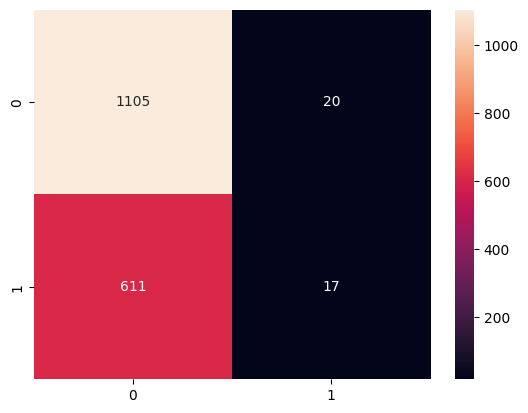

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

#### Accuracy

In [36]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.6400456360524814


#### Precision

In [37]:
print("Precision Score:", precision_score(y_test, y_pred))

Precision Score: 0.4594594594594595


#### Recall

In [38]:
print("Recall Score:", recall_score(y_test, y_pred))

Recall Score: 0.027070063694267517


#### F1-Score

In [39]:
print("F1-Score:", f1_score(y_test, y_pred))

F1-Score: 0.05112781954887218


#### Classification Report

In [40]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.46      0.03      0.05       628

    accuracy                           0.64      1753
   macro avg       0.55      0.50      0.41      1753
weighted avg       0.58      0.64      0.52      1753



#### Feature Imortance Metrix in Random Forest / Feature Extraction

In [41]:
score_list = rf.feature_importances_
list_of_features = list(X.columns)
score_df = pd.DataFrame({"Feature":list_of_features, 'Score':score_list})
score_df.sort_values(by = 'Score', ascending = False)

,Feature,Score
16,BMI,0.082989
9,Exercise Hours Per Week,0.082550
14,Sedentary Hours Per Day,0.082016
17,Triglycerides,0.081184
15,Income,0.080470
2,Cholesterol,0.077934
20,Systolic_BP,0.072344
3,Heart Rate,0.071039
0,Age,0.070956
21,Diastolic_BP,0.065945


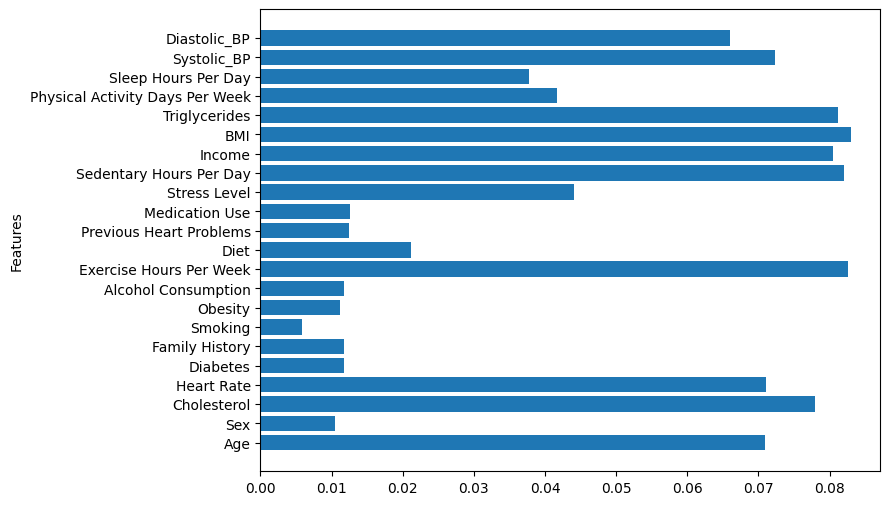

In [42]:
list_of_features = list(X.columns)
plt.figure(figsize= (8,6))
plt.barh(range(len(list_of_features)), rf.feature_importances_)
plt.yticks(np.arange(len(list_of_features)),list_of_features)
plt.ylabel('Features')
plt.show()

#### k-fold Cross Validation

In [43]:
# apply 5-fold cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores =', scores)

Cross-validation scores = [0.63124108 0.62767475 0.63552068 0.63694722 0.63480742]


In [44]:
Avg_Model_score = scores.mean()
print('Average Model Score = ', Avg_Model_score)

Average Model Score =  0.6332382310984308


#### Hyper Parameter Tuning

##### Grid Search CV | Random Search CV

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

##### List of Parameters

In [46]:
parameters = {
  'n_estimators' : [50,100],
  'max_features' : ['sqrt', 'log2', None]
}

##### Search the Best parameters

In [47]:
grid_search = GridSearchCV(estimator= rf, param_grid=parameters)

In [48]:
grid_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_features': ['sqrt', 'log2', ...], 'n_estimators': [50, 100]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


##### Best parameters

In [49]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

##### Building New Model with best parameters

In [50]:
Random_forest_model_new = RandomForestClassifier(max_features='sqrt', n_estimators=100)
Random_forest_model_new.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


##### K fold Cross validation : K=5

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores =', scores)

Cross-validation scores = [0.63195435 0.63552068 0.63052782 0.63409415 0.62910128]


##### Average Accuracy Score of Cross Validation

In [52]:
Avg_Model_score = scores.mean()
print('Average Model Score =', Avg_Model_score)

Average Model Score = 0.6322396576319544
